<a href="https://colab.research.google.com/github/Madhumitha-Reddy/OIBSIP/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME - IRIS FLOWER CLASSIFICATION

The aim is to classify the iris flowers among three species(setosa, versicolor, or virginica) from measurements of sepals and petals length and width.

The iris dataset contains 3 classes of 50 instances each, where each class refers to type of iris plant.

The central goal here is to design a model that makes useful classification for new flowers or, in other words, one which exhibits good generalization

IMPORTING LIBRARIES

In [ ]:
# importing all the essential libraries for our project

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

LOADING THE DATASET

In [ ]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
#load the data
df = pd.read_csv('Iris.csv', names=columns)
df.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
print(df.dtypes)

SepalLengthCm    object
SepalWidthCm     object
PetalLengthCm    object
PetalWidthCm     object
Species          object
dtype: object


VISUALIZATION OF DATASET

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,151,151,151,151,151
unique,36,24,44,23,4
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


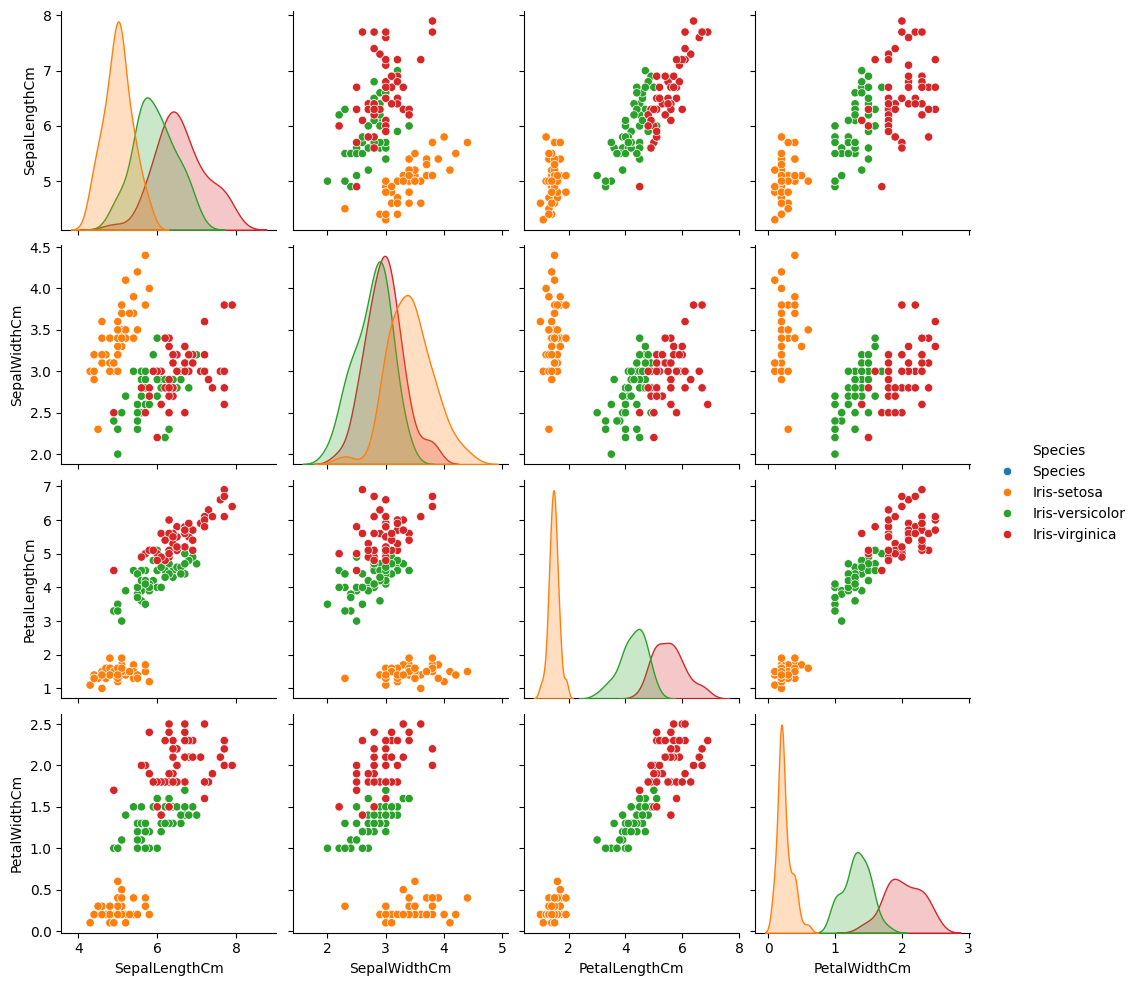

In [ ]:
#visualize the whole dataset
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

sns.pairplot(df, hue='Species')

SEPERATING INPUT COLUMNS AND THE OUTPUT COLUMN

In [ ]:
#seperate features and target
data = df.values

X = data[:,0:4]
Y = data[:,4]
print(Y)

['Species' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris

In [ ]:
print("Train shape:", X_train_clean.shape)
print("Test shape :", X_test_clean.shape)
print("Train columns:", Y_train_clean.columns)
print("Test columns :", Y_test_clean.columns)

Train shape: (119, 3)
Test shape : (31, 3)
Train columns: Index([1, 2, 3], dtype='int64')
Test columns : Index([1, 2, 3], dtype='int64')


SPLITTING THE DATA INTO TRAINING AND TESTING

In [ ]:
#split the data to train and test dataset
from sklearn.model_selection import train_test_split
X_train_clean, X_test_clean, Y_train_clean, Y_test_clean = train_test_split(X, Y, test_size=0.2)

MODEL1: SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
#support vector machine algorithm
from sklearn.svm import SVC

# Convert X_train and y_train to DataFrame/Series
X_train_df = pd.DataFrame(X_train_clean)
y_train_series = pd.Series(Y_train_clean)

# Combine and drop NaNs
train_df = pd.concat([X_train_df, y_train_series], axis=1)
train_df.dropna(inplace=True)

# Split back
X_train_clean = train_df.drop(columns=train_df.columns[-1])  # all but last column
y_train_clean = train_df.iloc[:, -1]

model_svc = SVC()
model_svc.fit(X_train_clean, y_train_clean)

SVC()

In [ ]:
train_features = X_train_clean.columns

In [ ]:
X_test_clean = X_test_clean[train_features]

In [ ]:
# Clean the test set
X_test_df = pd.DataFrame(X_test_clean)
y_test_series = pd.Series(Y_test_clean)

# Combine and drop NaNs
test_df = pd.concat([X_test_df, y_test_series], axis=1)
test_df.dropna(inplace=True)

# Split back
X_test_clean = test_df.drop(columns=test_df.columns[-1])  # features
y_test_clean = test_df.iloc[:, -1]                        # target

# Align test columns with train
X_test_clean = X_test_clean[X_train_clean.columns]

In [ ]:
prediction1 = model_svc.predict(X_test_clean)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test_clean, prediction1)*100)
for i in range(len(prediction1)):
    print(y_test_clean[i], " ", prediction1[i])

Accuracy: 66.66666666666666
Iris-versicolor   Iris-versicolor
Iris-versicolor   Iris-versicolor
Iris-versicolor   Iris-setosa


MODEL2 : LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train_clean,y_train_clean)

LogisticRegression()

In [ ]:
prediction2 = model_LR.predict(X_test_clean)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_clean, prediction2)*100)
for i in range(len(prediction2)):
    print(y_test_clean[i], " ", prediction2[i])

33.33333333333333
Iris-versicolor   Iris-versicolor
Iris-versicolor   Iris-virginica
Iris-versicolor   Iris-setosa


MODEL3 : DECISION TREE CLASSIFIER

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train_clean,y_train_clean)

DecisionTreeClassifier()

In [ ]:
prediction3 = model_svc.predict(X_test_clean)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_clean, prediction3)*100)
for i in range(len(prediction3)):
    print(y_test_clean[i], " ", prediction3[i])

66.66666666666666
Iris-versicolor   Iris-versicolor
Iris-versicolor   Iris-versicolor
Iris-versicolor   Iris-setosa


In [ ]:
#detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_clean, prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         0
Iris-versicolor       1.00      0.33      0.50         3
 Iris-virginica       0.00      0.00      0.00         0

       accuracy                           0.33         3
      macro avg       0.33      0.11      0.17         3
   weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_new = np.array([[3, 2, 1], [2.9, 2.2, 3.8], [2.9, 2.5, 5.5]])
#prediction of the species from the input vector
prediction = model_svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
